In [ ]:
import numpy as np
from cpp_algorithms import dist_fill
from cpp_algorithms import darp, stc, bcd, wavefront
from cpp_algorithms import get_drone_map, get_random_coords
from cpp_algorithms import get_all_area_maps, imshow, imshow_scatter
from cpp_algorithms.darp.darp_helpers import get_assigned_count
from cpp_algorithms.coverage_path.pathing_helpers import has_isolated_areas

In [2]:
n = 3
area_maps = get_all_area_maps("test_maps")
area_map = area_maps[0]
start_points = get_random_coords(area_map, n)


assigned :  [239 238 239]
has isolated :  [False, False, False]


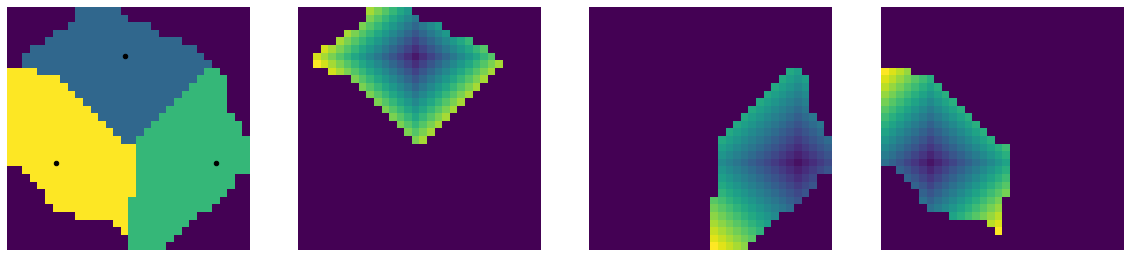

In [10]:
start_points = get_random_coords(area_map, n)
A, losses = darp(300, area_map, start_points, pbar=True)
drone_maps = [get_drone_map(A,i) for i in range(n)]

print("assigned : ", get_assigned_count(A))
print('has isolated : ',[has_isolated_areas(dm) for dm in drone_maps])
imshow(A,1,4,1, figsize=(20,5))
imshow_scatter(start_points,color="black")
[imshow(dist_fill(drone_maps[i],[start_points[i]]),1,4,i+2)  for i in range(n)];

**Wavefront**

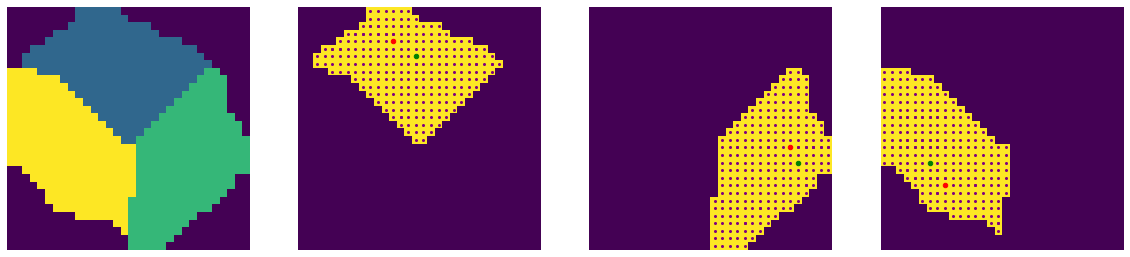

In [12]:
coverage_paths = [wavefront(drone_maps[i],start_points[i]) for i in range(n)]
imshow(A,1,4,1, figsize=(20,5))
for i in range(n):
    imshow(drone_maps[i],1,4,i+2)
    imshow_scatter(coverage_paths[i],color='purple',s=4)
    end_point = coverage_paths[i][-1]
    imshow_scatter(start_points[i], color="green")
    imshow_scatter(end_point, color="red")

**BCD**

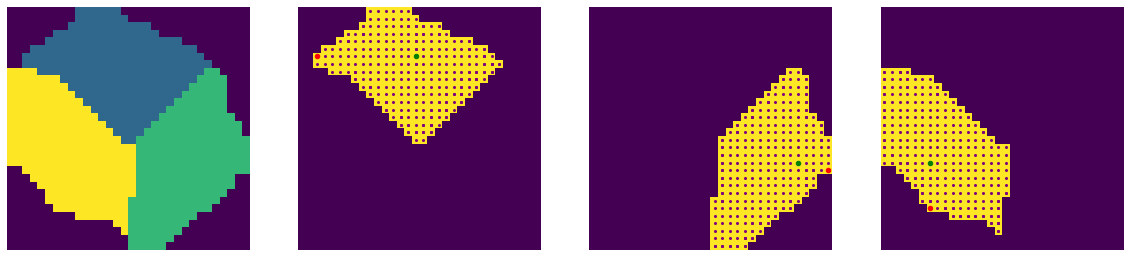

In [13]:
coverage_paths = [bcd(drone_maps[i],start_points[i]) for i in range(n)]
imshow(A,1,4,1, figsize=(20,5))
for i in range(n):
    imshow(drone_maps[i],1,4,i+2)
    imshow_scatter(coverage_paths[i],color='purple',s=4)
    end_point = coverage_paths[i][-1]
    imshow_scatter(start_points[i], color="green")
    imshow_scatter(end_point, color="red")

**STC**

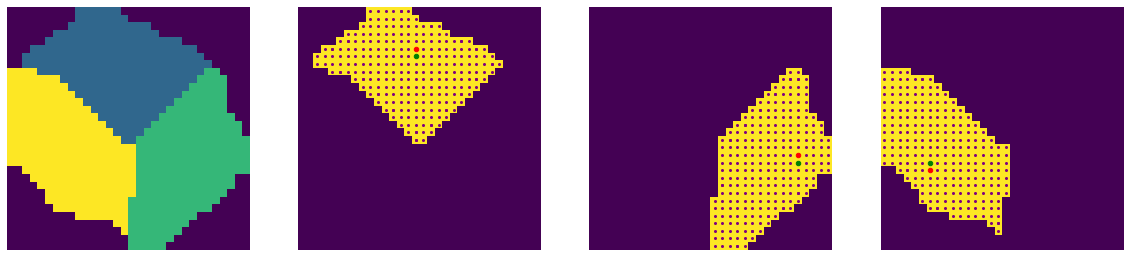

In [14]:
coverage_paths = [stc(drone_maps[i],start_points[i]) for i in range(n)]
imshow(A,1,4,1, figsize=(20,5))
for i in range(n):
    imshow(drone_maps[i],1,4,i+2)
    imshow_scatter(coverage_paths[i],color='purple',s=4)
    end_point = coverage_paths[i][-1]
    imshow_scatter(start_points[i], color="green")
    imshow_scatter(end_point, color="red")